In [1]:
#from synthetic_data import return_normalized_data_synthetic,plot_pca,plot_mask,plot_synthetic
from synthetic_data2 import return_synthetic_data
import sys  
sys.path.insert(0, "/".join(sys.path[0].split("/")[0:-2])+('/src'))
#from em_multi_spike._em_multi_spike import Multi_spike
sys.path
from sisal.solver import Solver
from sisal.utils import normalize_train_test_full_loader
import argparse

In [2]:
centroids,SNR,mask = return_synthetic_data()
print('centroids = ',centroids.shape)
print('SNR : ', SNR.shape)
print('mask : ', mask.shape)

centroids =  (238428, 212)
SNR :  (238428,)
mask :  (238428,)


In [3]:
train_loader, test_loader, full_index_loader = normalize_train_test_full_loader(centroids,mask,batch_size=32,alpha=SNR)

##### =  10 500 500
#### Plot of spatial image
#### Plot spectra signals


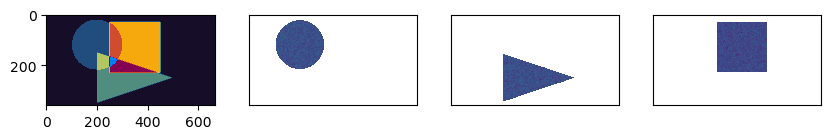

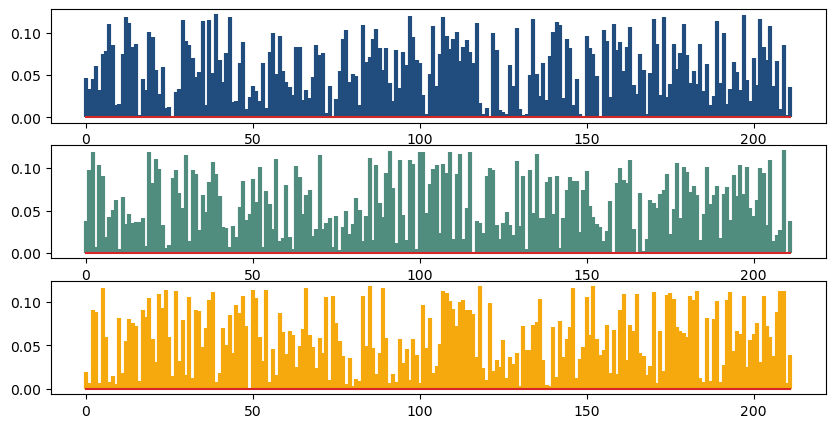

In [2]:
plot_synthetic()

In [4]:
args = argparse.Namespace(
    beta=4, 
    z_dim=2, 
    epochs=40,
    device ='cpu',
    save_model_epochs=False,
    save_loss = False,
    train=True)
in_size = centroids.shape[1]

212

In [7]:
net = Solver(args,in_size)
PATH = 'model_synthetic.pth' #path where the model is saved
net.train(train_loader, test_loader,PATH) 

EPOCH 1:
  batch 1000 loss: 47.77069411277771
  batch 2000 loss: 36.81517482185364
  batch 3000 loss: 34.41797288513184
  batch 4000 loss: 33.150351041793826
  batch 5000 loss: 32.93597581100464
LOSS train 32.93597581100464 valid 29.964649740641548
----------------Saving Model Epoch 1
EPOCH 2:
  batch 1000 loss: 31.585957471847536
  batch 2000 loss: 31.007961288452147
  batch 3000 loss: 31.124617635726928
  batch 4000 loss: 30.88111322593689
  batch 5000 loss: 31.086702785491944
LOSS train 31.086702785491944 valid 29.82781254813175
----------------Saving Model Epoch 2
EPOCH 3:
  batch 1000 loss: 30.63781111717224
  batch 2000 loss: 30.623083795547487
  batch 3000 loss: 30.57365542221069
  batch 4000 loss: 30.413129301071166
  batch 5000 loss: 30.40517964172363
LOSS train 30.40517964172363 valid 29.25922523600943
----------------Saving Model Epoch 3
EPOCH 4:
  batch 1000 loss: 30.206414878845216
  batch 2000 loss: 30.175609901428224
  batch 3000 loss: 30.22997688293457
  batch 4000 loss

'model_synthetic.pth'